# Shot Prompting

## Zero-Shot Prompting
Zero-shot prompting refers to the situation where the model is asked to perform a task without having seen any examples of that task beforehand. The model relies purely on its vast knowledge from pre-training to infer the answer.

In **zero-shot learning**, the model solves new tasks by using what it learned during training. Even if the model hasn't been specifically taught how to perform a task, it can still find the right answer, denoted as \( y \), for a given input \( x \).

This works because the model uses its pre-trained knowledge to understand the task \( T \) and then predicts a likely answer \( y \) based on the input \( x \).  We can express this process mathematically as:

$$
P(y | x, T) = \text{Model}(x)
$$


Here, the model interprets the input \( x \) by considering the task \( T \) and then generates the most likely response based on its prior knowledge.

This allows the model to handle tasks it was not directly trained for, as long as it can understand the task from its pre-existing knowledge.


In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [27]:
import pandas as pd
from langchain_groq.chat_models import ChatGroq
from PIL import Image
import pytesseract

In [28]:
Groq_Token = "your_groq_api_key_here" 

groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

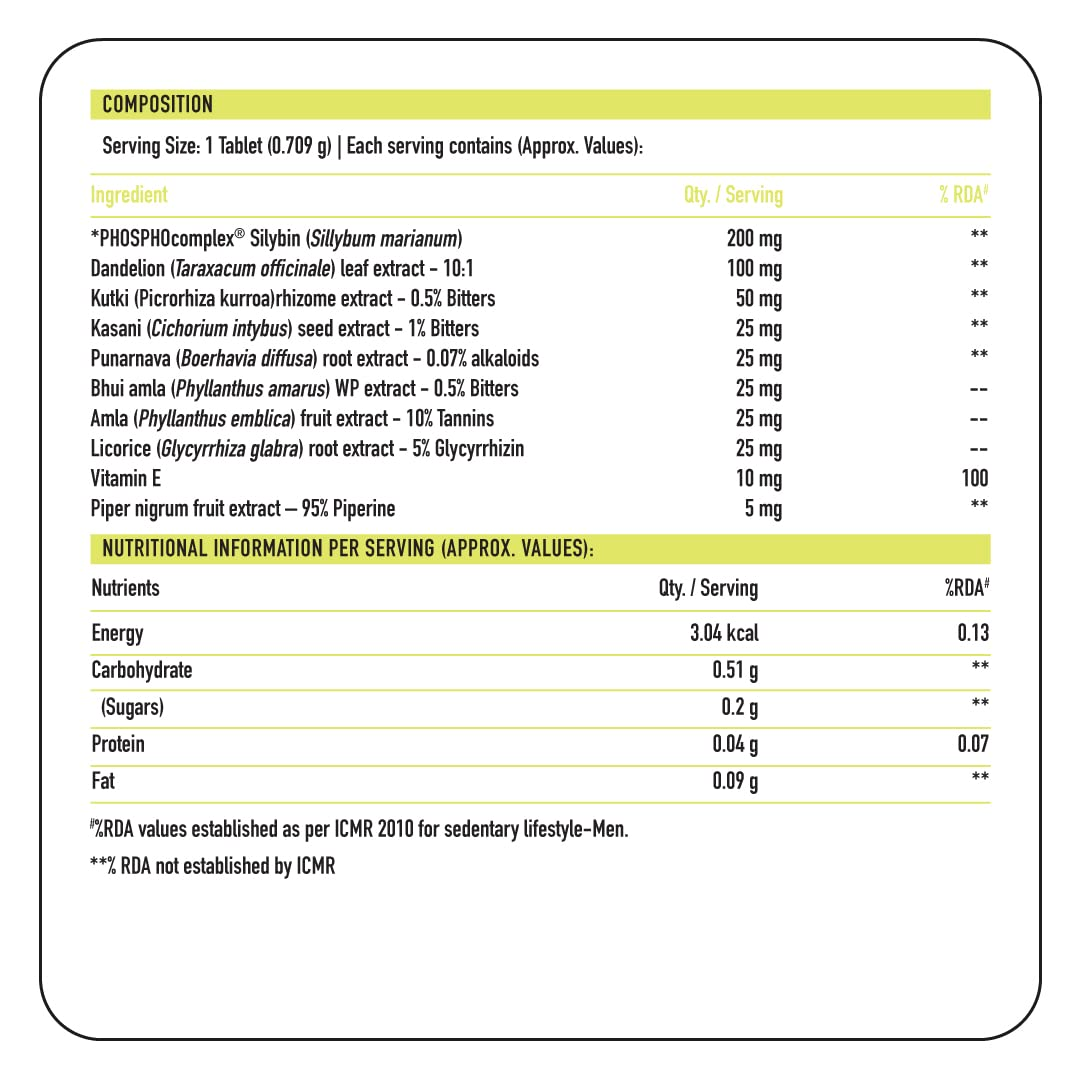

In [29]:
image_path = "img2_shot.jpg"  
image = Image.open(image_path)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
extracted_text = pytesseract.image_to_string(image)

In [30]:
extracted_text

'Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):\n\nIngredient Oty. / Serving\n\n*PHOSPHOcomplex® Silybin (Sillybum marianum) 200 mg\nDandelion (Taraxacum officinale) leaf extract - 10:1 100 mg\nKutki (Picrorhiza kurroa)rhizome extract - 0.5% Bitters 50 mg\nKasani (Cichorium intybus) seed extract - 1% Bitters 25 mg\nPunarnava (Boerhavia diffusa) root extract - 0.07% alkaloids 25 mg\nBhui amla (Phyllanthus amarus) WP extract - 0.5% Bitters 25 mg\nAmla (Phyllanthus emblica) fruit extract - 10% Tannins 25 mg\nLicorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin 25 mg\nVitamin E 10 mg\nPiper nigrum fruit extract — 95% Piperine 5mg\n\nNutrients Qty. / Serving\n\nEnergy 3.04 kcal\nCarbohydrate 051g\n(Sugars) 02g\nProtein 0.049\nFat 0.09 g\n\n"ZRDA values established as per ICMR 2010 for sedentary lifestyle-Men.\n**Z RDA not established by ICMR\n\n'

In [32]:
query = f"""
* You are an information extraction model.
* Your task is to analyze the extracted text and extract relevant information such as weight or height.
* Provide the extracted information along with a brief explanation of your reasoning.

Extracted Text: {extracted_text}
""" 

In [33]:
model_name = "llama3-70b"  
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

After analyzing the extracted text, I have identified the following relevant information related to weight and other measurements:

* **Weight:** The serving size is 1 tablet, which weighs 0.709 g.
* **Height:** No information about height is mentioned in the extracted text.

Additionally, I have extracted other relevant information related to the nutritional content of the supplement:

* **Energy:** 3.04 kcal per serving
* **Carbohydrate:** 0.51 g per serving
* **Sugars:** 0.02 g per serving
* **Protein:** 0.049 g per serving
* **Fat:** 0.09 g per serving

My reasoning is based on the explicit mention of these values in the "Nutrients Qty. / Serving" section of the extracted text.


## Few-Shot Prompting
Few-shot prompting involves giving the model a few examples of the task before asking it to generate an output. The examples provided in the prompt guide the model, making it more likely to understand and perform the task correctly.

**Few-shot prompting** adds a few labeled examples to help the model learn specific information quickly. The model uses these examples without needing to adjust its internal parameters (like gradient updates) or do task-specific fine-tuning.

Mathematically, few-shot learning can be represented as:

$$
P(y \mid x, \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}, T) = \text{Model}(x)
$$

Where \(x_1, y_1, ..., x_n, y_n\) are the labeled examples given in the prompt. The model uses these examples to understand the relationship between \(x\) and \(y\), and then applies that understanding to new inputs.

Few-shot prompting strikes a balance between zero-shot learning and full fine-tuning. It improves the model's performance by giving it a few examples to understand the task better.


| **Feature**           | **Zero-Shot Prompting**                        | **Few-Shot Prompting**                         |
|-----------------------|------------------------------------------------|------------------------------------------------|
| **Examples**          | No examples provided                           | Few task-specific examples are provided        |
| **Model Training**     | Relies solely on pre-trained knowledge         | Uses pre-trained knowledge + prompt examples   |
| **Task Familiarity**   | Useful for general tasks                       | Better for more complex or specific tasks      |
| **Flexibility**        | High flexibility but can be less accurate      | More accurate with task examples               |


In [49]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
from langchain_groq.chat_models import ChatGroq
from PIL import Image
import pytesseract


In [35]:
Groq_Token = "your_groq_api_key_here" 

groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

## Image1

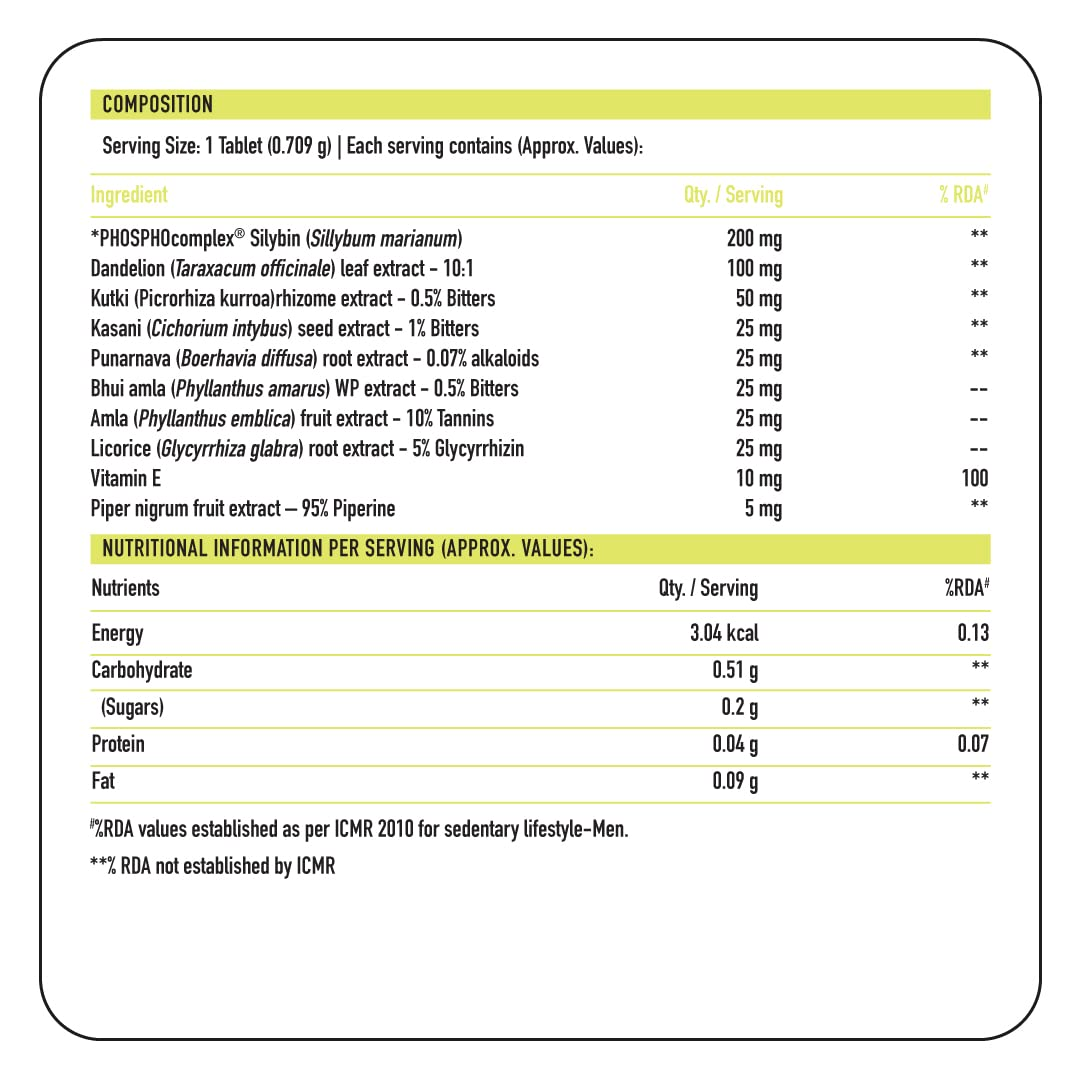

In [36]:
image_path = "img2_shot.jpg"  
image = Image.open(image_path)

In [37]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [38]:
extracted_text = pytesseract.image_to_string(image)

In [39]:
extracted_text

'Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):\n\nIngredient Oty. / Serving\n\n*PHOSPHOcomplex® Silybin (Sillybum marianum) 200 mg\nDandelion (Taraxacum officinale) leaf extract - 10:1 100 mg\nKutki (Picrorhiza kurroa)rhizome extract - 0.5% Bitters 50 mg\nKasani (Cichorium intybus) seed extract - 1% Bitters 25 mg\nPunarnava (Boerhavia diffusa) root extract - 0.07% alkaloids 25 mg\nBhui amla (Phyllanthus amarus) WP extract - 0.5% Bitters 25 mg\nAmla (Phyllanthus emblica) fruit extract - 10% Tannins 25 mg\nLicorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin 25 mg\nVitamin E 10 mg\nPiper nigrum fruit extract — 95% Piperine 5mg\n\nNutrients Qty. / Serving\n\nEnergy 3.04 kcal\nCarbohydrate 051g\n(Sugars) 02g\nProtein 0.049\nFat 0.09 g\n\n"ZRDA values established as per ICMR 2010 for sedentary lifestyle-Men.\n**Z RDA not established by ICMR\n\n'

In [42]:
query = f"""
* You are an information extraction model.
* Your task is to analyze the extracted text and extract relevant information such as weight or height.
* Provide the extracted information along with a brief explanation of your reasoning.

Here are a few examples:
1. Extracted Text: 'The bottle weighs 500g.'
   Extracted Information: 500g 

2. Extracted Text: 'The height of the box is 25 cm.'
   Extracted Information: 25 cm 

3. Extracted Text: 'Net weight: 709 gm.'
   Extracted Information: 709 gm 

Extracted Text: {extracted_text}
""" 

In [43]:
model_name = "llama3-70b" 
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

Extracted Text: Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):

...

Extracted Information:

* Weight: 0.709 g (extracted from the serving size information, which specifies the weight of one tablet)

Reasoning: The extracted text explicitly mentions the weight of one tablet as 0.709 g, which is a direct measurement of weight.


## Doing it for another image

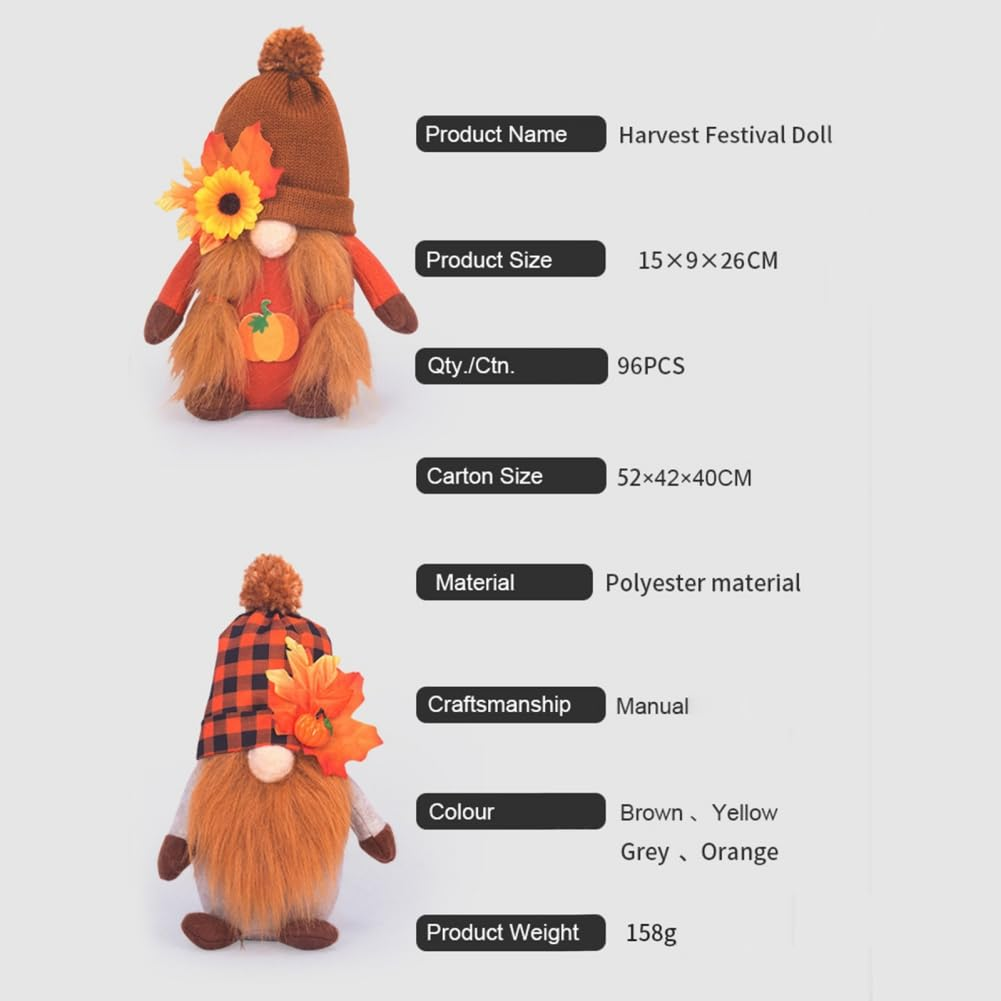

In [58]:
image_path = "img1_shot.jpg" 
image = Image.open(image_path)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
extracted_text = pytesseract.image_to_string(image)

In [59]:
extracted_text

'Product Name Harvest Festival Doll\n\n15X9X26CM\n52x42x40CM\nPolyester material\n\nCraftsmanship Manual\n\nGrey . Orange\n\nProduct Wei 158g\n\n'

In [60]:

query = f"""
* You are an information extraction model.
* Your task is to analyze the extracted text and extract relevant information such as weight or height.
* Provide the extracted information along with a brief explanation of your reasoning.

Here are a few examples:
1. Extracted Text: 'The bottle weighs 500g.'
   Extracted Information: 500g 

2. Extracted Text: 'The height of the box is 25 cm.'
   Extracted Information: 25 cm 

3. Extracted Text: 'Net weight: 709 gm.'
   Extracted Information: 709 gm 

Extracted Text: {extracted_text}
""" 

In [61]:
model_name = "llama3-70b"  
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

After analyzing the extracted text, I found the following relevant information:

Extracted Information: 
- Height: 26CM (from the dimension 15X9X26CM)
- Weight: 158g (from the text "Product Wei 158g")

Reasoning:
- I extracted the height by identifying the dimension "15X9X26CM" which represents the length, width, and height of the product, respectively. 
- I extracted the weight by identifying the text "Product Wei 158g" which explicitly mentions the weight of the product.
